In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
cleaned_annual_data = pd.read_csv('../clean_data/cleaned_annual_data.csv')
total_annual = pd.read_csv('../clean_data/total_annual.csv')
cleaned_annual_data

,Unnamed: 0,ParkName,ParkType,Region,State,Year,RecreationVisitsTotal,RecreationHoursTotal,TentCampersTotal,RVCampersTotal,BackcountryTotal
0,275,Acadia,National Park,Northeast,ME,2001,2516551,13467741,118545,24747,0
1,287,Acadia,National Park,Northeast,ME,2002,2558572,13683657,122340,22545,0
2,299,Acadia,National Park,Northeast,ME,2003,2431062,13012171,117369,21876,0
3,311,Acadia,National Park,Northeast,ME,2004,2207847,11822104,101577,19878,0
4,323,Acadia,National Park,Northeast,ME,2005,2051484,10568105,85815,19302,1157
...,...,...,...,...,...,...,...,...,...,...,...
1170,29890,Zion,National Park,Intermountain,UT,2015,3648846,25028289,133528,73783,24655
1171,29902,Zion,National Park,Intermountain,UT,2016,4295127,28963497,137442,70728,28248
1172,29914,Zion,National Park,Intermountain,UT,2017,4504812,30274711,138245,72425,25470
1173,29926,Zion,National Park,Intermountain,UT,2018,4320033,29913878,132988,72016,22964


In [3]:
cleaned_annual_data = cleaned_annual_data.loc[(cleaned_annual_data['Year']  > 2009),:]
tops=cleaned_annual_data.groupby('ParkName')
top8=pd.DataFrame(tops['State'].unique())
top8['avg_visits']=tops['RecreationVisitsTotal'].mean()
top8['avg_tent']=pd.DataFrame(tops['TentCampersTotal'].mean())
top8['avg_backcountry']=pd.DataFrame(tops['BackcountryTotal'].mean())
top8

,State,avg_visits,avg_tent,avg_backcountry
ParkName,,,,
Acadia,[ME],2872666.5,133100.1,1275.3
Arches,[UT],1334062.5,22193.0,835.0
Badlands,[SD],951227.3,5021.0,1777.0
Big Bend,[TX],377153.8,49238.4,26267.6
Biscayne,[FL],509950.4,2574.9,0.0
...,...,...,...,...
Wind Cave,[SD],582902.8,3722.4,314.0
Wrangell-St. Elias & PRES,[AK],75193.2,0.0,0.0
Yellowstone,[WY],3779045.3,90312.2,41781.6


In [4]:
recvis=top8.sort_values("avg_visits",ascending = False)
recvis=recvis.iloc[:9,:]
recvis=recvis.reset_index()
recvis

,ParkName,State,avg_visits,avg_tent,avg_backcountry
0,Great Smoky Mountains,[TN],10494546.4,156264.4,91421.2
1,Grand Canyon,[AZ],5252921.8,151794.0,298720.8
2,Yosemite,[CA],4122831.0,486853.8,163664.8
3,Rocky Mountain,[CO],3815953.3,106735.2,38314.1
4,Yellowstone,[WY],3779045.3,90312.2,41781.6
5,Zion,[UT],3571925.3,121132.3,32307.0
6,Olympic,[WA],3137142.4,126529.9,84219.4
7,Grand Teton,[WY],3007601.5,13.5,33400.0
8,Acadia,[ME],2872666.5,133100.1,1275.3


In [5]:
tenters=top8.sort_values("avg_tent",ascending = False)
tenters=tenters.iloc[:9,:]
tenters=tenters.reset_index()
tenters

,ParkName,State,avg_visits,avg_tent,avg_backcountry
0,Yosemite,[CA],4122831.0,486853.8,163664.8
1,Joshua Tree,[CA],2051616.4,204260.8,13973.8
2,Great Smoky Mountains,[TN],10494546.4,156264.4,91421.2
3,Grand Canyon,[AZ],5252921.8,151794.0,298720.8
4,Acadia,[ME],2872666.5,133100.1,1275.3
5,Sequoia,[CA],1118361.2,129608.0,29451.2
6,Olympic,[WA],3137142.4,126529.9,84219.4
7,Zion,[UT],3571925.3,121132.3,32307.0
8,Glacier,[MT],2537794.6,112786.4,31436.7


In [6]:
backpackers=top8.sort_values("avg_backcountry",ascending = False)
backpackers=backpackers.iloc[:9,:]
backpackers=backpackers.reset_index()
backpackers

,ParkName,State,avg_visits,avg_tent,avg_backcountry
0,Grand Canyon,[AZ],5252921.8,151794.0,298720.8
1,Yosemite,[CA],4122831.0,486853.8,163664.8
2,Great Smoky Mountains,[TN],10494546.4,156264.4,91421.2
3,Olympic,[WA],3137142.4,126529.9,84219.4
4,Canyonlands,[UT],599384.7,13535.0,71755.3
5,Mount Rainier,[WA],1272209.5,67055.6,49011.9
6,Shenandoah,[VA],1297377.0,109212.0,42322.1
7,Yellowstone,[WY],3779045.3,90312.2,41781.6
8,Voyageurs,[MN],230857.1,0.0,39527.3


In [7]:
def barchart(xlegend,yaxis,visit_type):
    plt.figure(figsize=(10,7))
    plt.title(f'National Parks: Annual Average {visit_type} (2010-2019)\n')
    plt.xticks(rotation = 85) 
    plt.ticklabel_format(style='plain')
    plt.ylim(0,yaxis.max()+yaxis.max()*.1)
    
    plt.bar(xlegend,yaxis,width=.8,color='dodgerblue')
    ax = plt.gca()
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    loc,lab=plt.xticks()
    for i in range(len(xlegend)):
        plt.text(loc[i], yaxis[i]+yaxis.max()*.02, f'{int(round(yaxis[i],0)):,}',ha='center')
    #plt.tight_layout()
    plt.gcf().subplots_adjust(bottom=0.30)
    plt.savefig(f"../plots/{visit_type}.png")

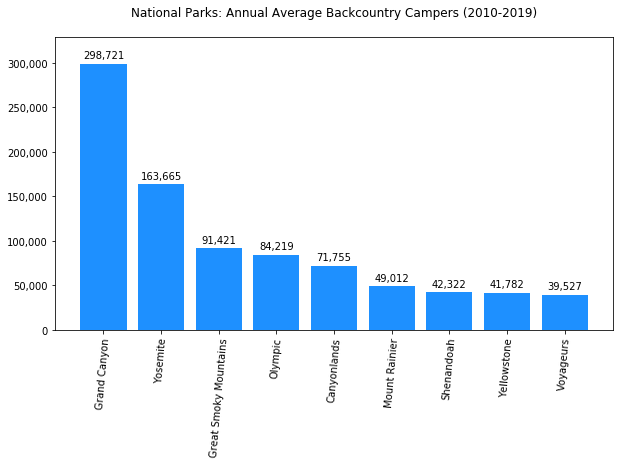

In [8]:
barchart(backpackers['ParkName'],backpackers['avg_backcountry'],'Backcountry Campers')
#loc,lab=plt.xticks()

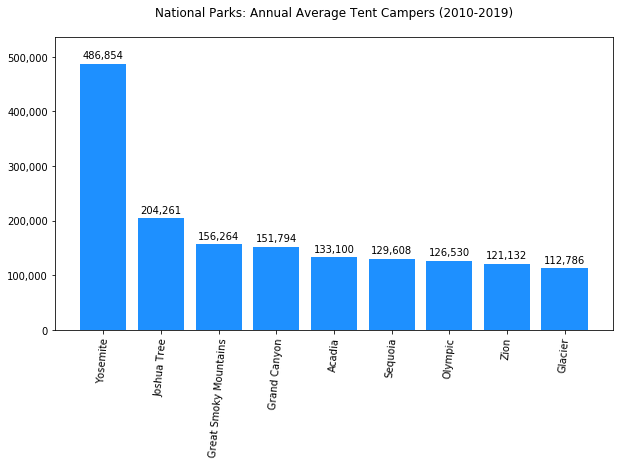

In [9]:
barchart(tenters['ParkName'],tenters['avg_tent'],'Tent Campers')

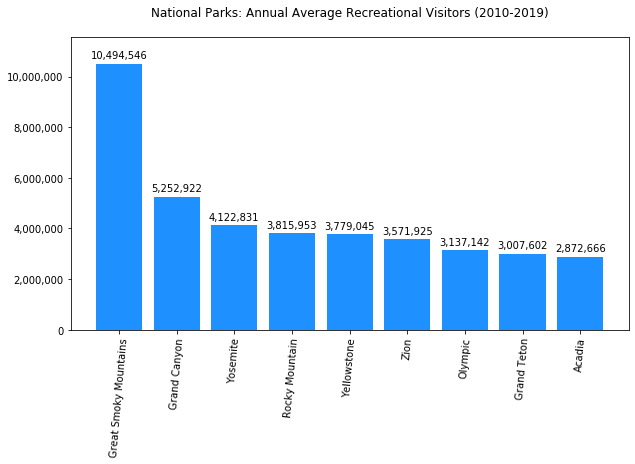

In [10]:
barchart(recvis['ParkName'],recvis['avg_visits'],'Recreational Visitors')

In [11]:
state = cleaned_annual_data.drop_duplicates(subset = ['ParkName'], keep ='last')
top_states=pd.DataFrame(state['State'].value_counts())
top_states=top_states.reset_index()

In [12]:
top_states=top_states.rename(columns={'index':'State','State':'Count'})
top_5=top_states.iloc[:5,:]
top_5

,State,Count
0,CA,9
1,AK,8
2,UT,5
3,CO,4
4,AZ,3


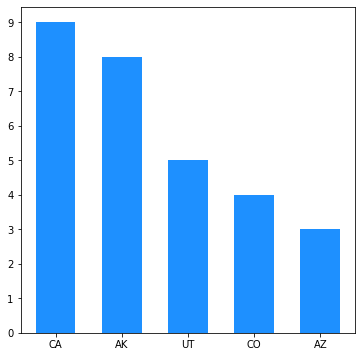

In [13]:
xlab=top_5['State']
yax=top_5['Count']

plt.figure(figsize=(6,6))
plt.yticks(np.arange(0,yax.max()+1,1))
#plt.title(f'National Parks: Annual Average {visit_type} (2010-2019)\n')

  

plt.bar(xlab,yax,width=.6,color='dodgerblue')

#plt.tight_layout()
plt.savefig(f"../plots/state_np_counts_top5.png")

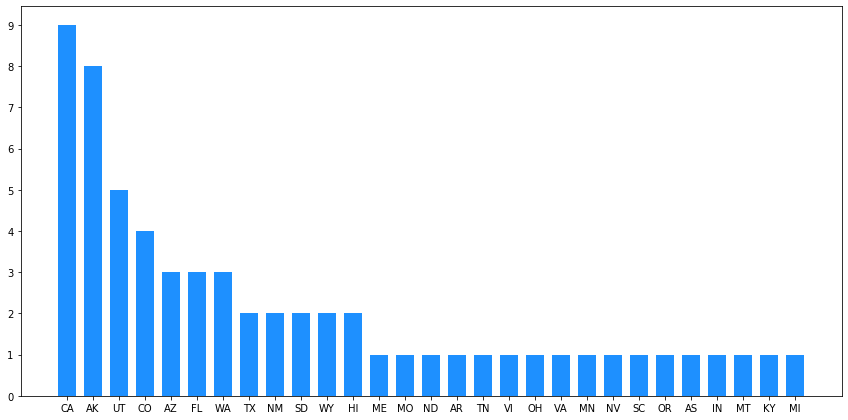

In [14]:
xl=top_states['State']
ya=top_states['Count']

plt.figure(figsize=(12,6))
plt.yticks(np.arange(0,yax.max()+1,1))
#plt.title(f'National Parks: Annual Average {visit_type} (2010-2019)\n')

plt.tight_layout(h_pad=0) 

plt.bar(xl,ya,width=.7,color='dodgerblue')



plt.savefig(f"../plots/state_np_counts.png")
plt.show()

In [15]:
recvis['ParkName'].tolist()

['Great Smoky Mountains',
 'Grand Canyon',
 'Yosemite',
 'Rocky Mountain',
 'Yellowstone',
 'Zion',
 'Olympic',
 'Grand Teton',
 'Acadia']

In [16]:
tenters['ParkName'].tolist()

['Yosemite',
 'Joshua Tree',
 'Great Smoky Mountains',
 'Grand Canyon',
 'Acadia',
 'Sequoia',
 'Olympic',
 'Zion',
 'Glacier']

In [17]:
backpackers['ParkName'].tolist()

['Grand Canyon',
 'Yosemite',
 'Great Smoky Mountains',
 'Olympic',
 'Canyonlands',
 'Mount Rainier',
 'Shenandoah',
 'Yellowstone',
 'Voyageurs']